In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('data/candy_production.csv', index_col='date', parse_dates=['date'])

In [35]:
df.tail()

,IPG3113N
date,
2018-08-01,112.279777
2018-09-01,123.126335
2018-10-01,123.634268
2018-11-01,126.960101
2018-12-01,129.571073


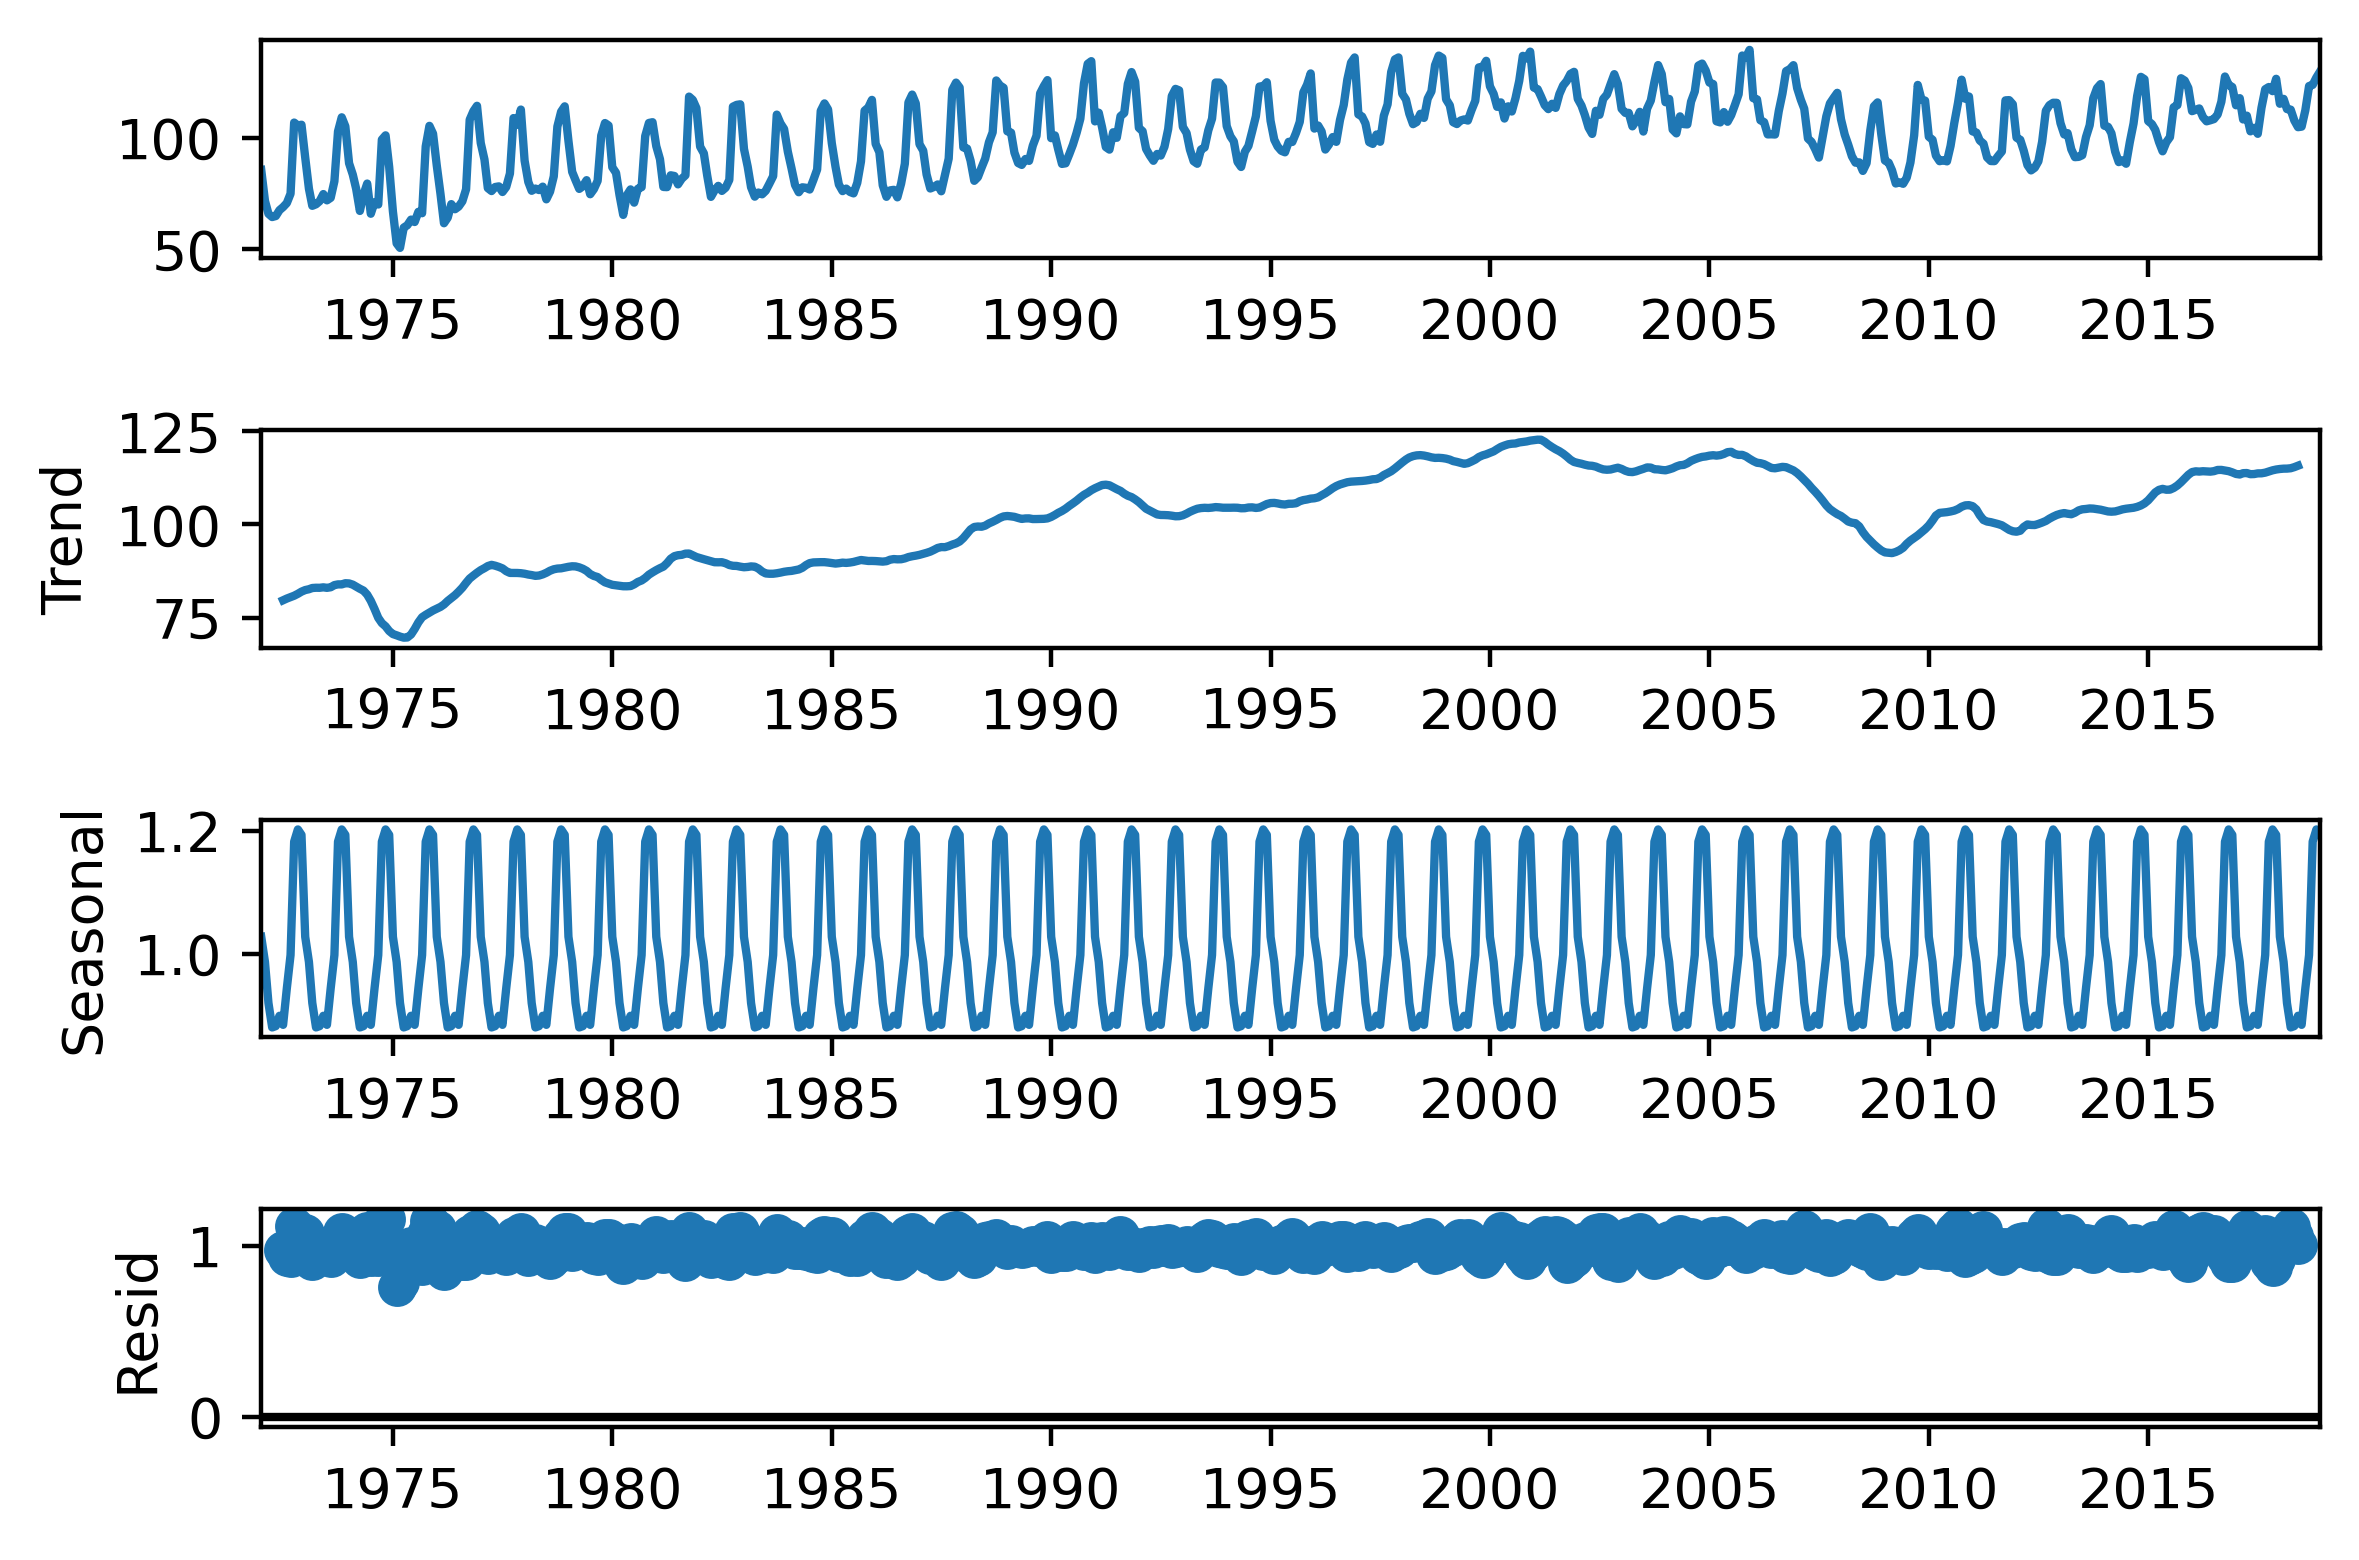

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(df, model='multiplicative')
decomp_results.plot()
plt.show()

In [56]:
train = df.loc['1975':'2013']
test = df.loc['2013':]
len(test)

72

In [48]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
import pmdarima as pm
model = pm.auto_arima(train,
                      seasonal=True, m=12,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=3, max_q=3,
                      max_P=3, max_Q=3,
                      trace=True,
                      error_action='ignore',
                      information_criterion='aic',
                      suppress_warnings=True) 

# Print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2551.402, Time=1.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2727.299, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2631.692, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2564.080, Time=0.46 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2557.553, Time=0.72 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2612.452, Time=0.40 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=2553.307, Time=3.29 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2553.358, Time=4.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2680.675, Time=0.10 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2551.665, Time=2.73 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2594.054, Time=1.09 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=12.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2560.432, Time=0.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=2573.982, Time=0.75 sec
 ARIMA(2,1,1)(1,1,1)[12

In [57]:
model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

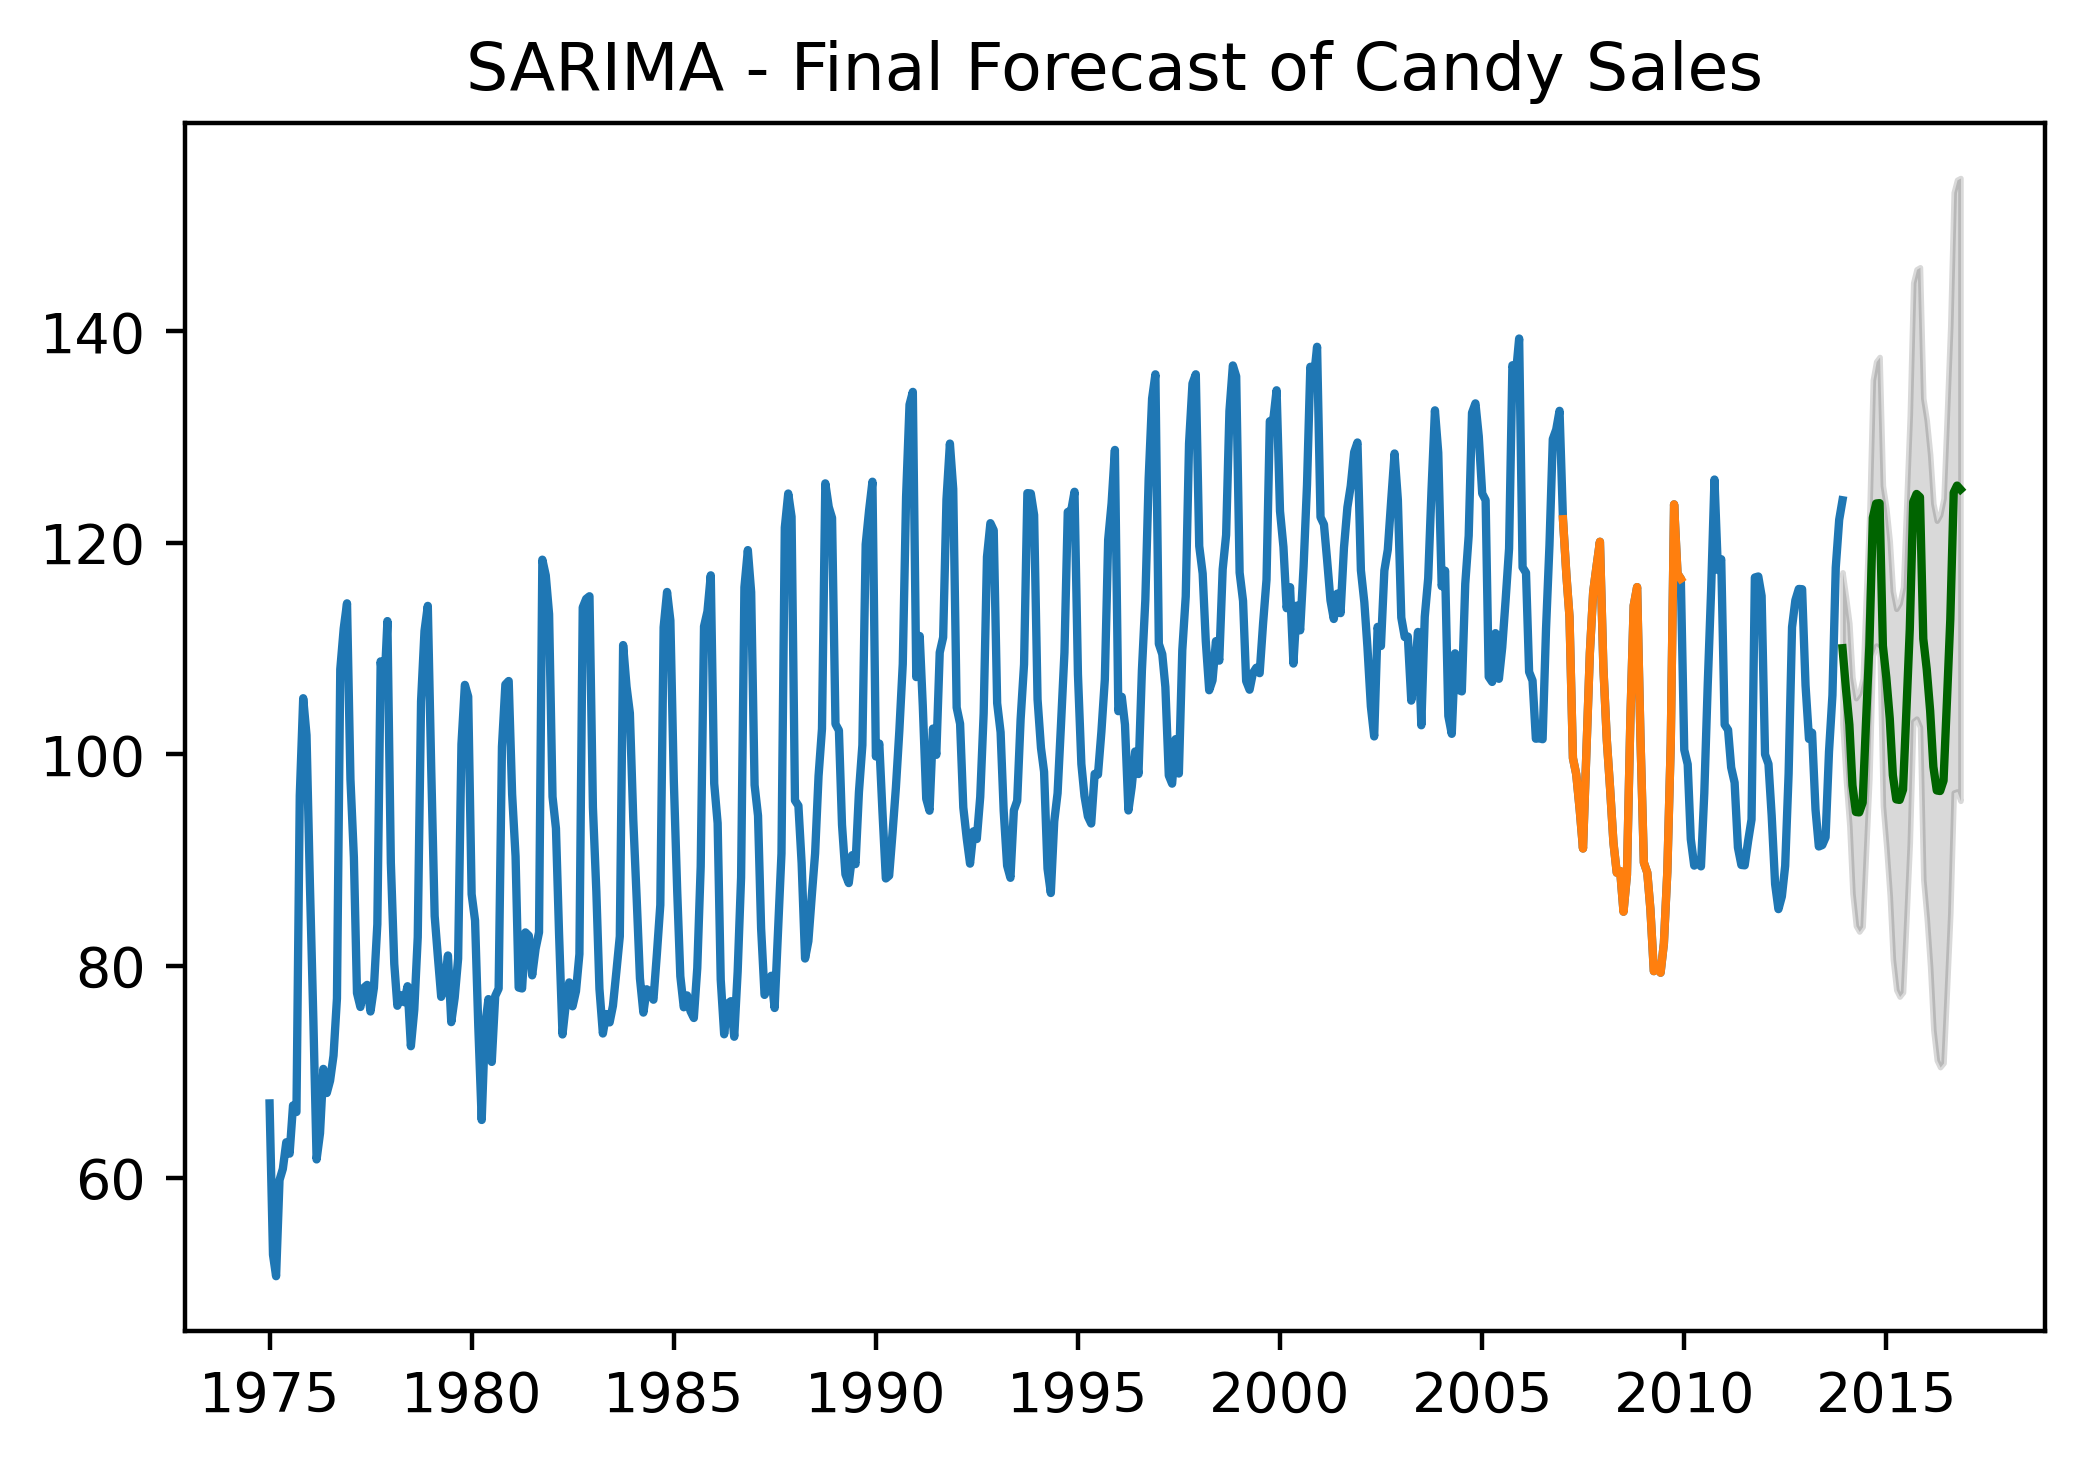

In [58]:
# Forecast
n_periods = 36
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
#plt.plot(test)
plt.plot(df_between)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Candy Sales")
plt.show()